In [ ]:
%%HTML
<style>
    body {
        --vscode-font-family: "KoddiUD 온고딕"
    }
</style>

In [23]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [2]:
# 한글 폰트 설정

# pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 0. 데이터 불러오기

- 데이터 출처
  - [Kaggle `Disney+ Movies and TV Shows`](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows)

In [8]:
df = pd.read_csv('disney.csv')

#  1. 데이터 살펴보기

## 1.1 기본 정보 확인

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


## 1.2 결측치 확인

### 결측치 비율

In [ ]:
for i in df.columns:
  missingValueRate = df[i].isna().sum() / len(df) * 100
  if missingValueRate > 0:
      print('{} null rate: {}%'.format(i, round(missingValueRate, 2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


### 결측치 개수

In [15]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 2. 전처리

## 2.1 결측치 처리

In [12]:
df['director'].fillna('No Data', inplace = True)

In [13]:
df['country'].replace(np.nan, 'No Data', inplace = True)
df['cast'].replace(np.nan, 'No Data', inplace = True)

In [14]:
df.dropna(axis = 0, inplace = True)

## 2.2 Feature Engineering

### 날짜 

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added']

0      2021-11-26
1      2021-11-26
2      2021-11-26
3      2021-11-26
5      2021-11-24
          ...    
1445   2021-06-04
1446   2021-04-02
1447   2020-12-18
1448   2020-09-18
1449   2020-04-01
Name: date_added, Length: 1444, dtype: datetime64[ns]

In [20]:
df['month_added'] = df['date_added'].dt.month
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",No Data,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",No Data,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11


# 3. 데이터 살펴보기

## 3.1 월별 Movie & TV Show

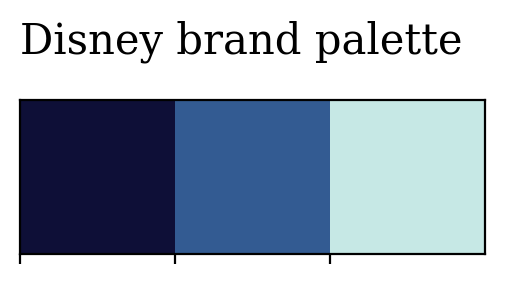

In [21]:
# 디즈니 플러스 상징 색깔 시각화
sns.palplot(['#0E0F37','#335B92','#C6E8E5'])

plt.title("Disney brand palette ", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

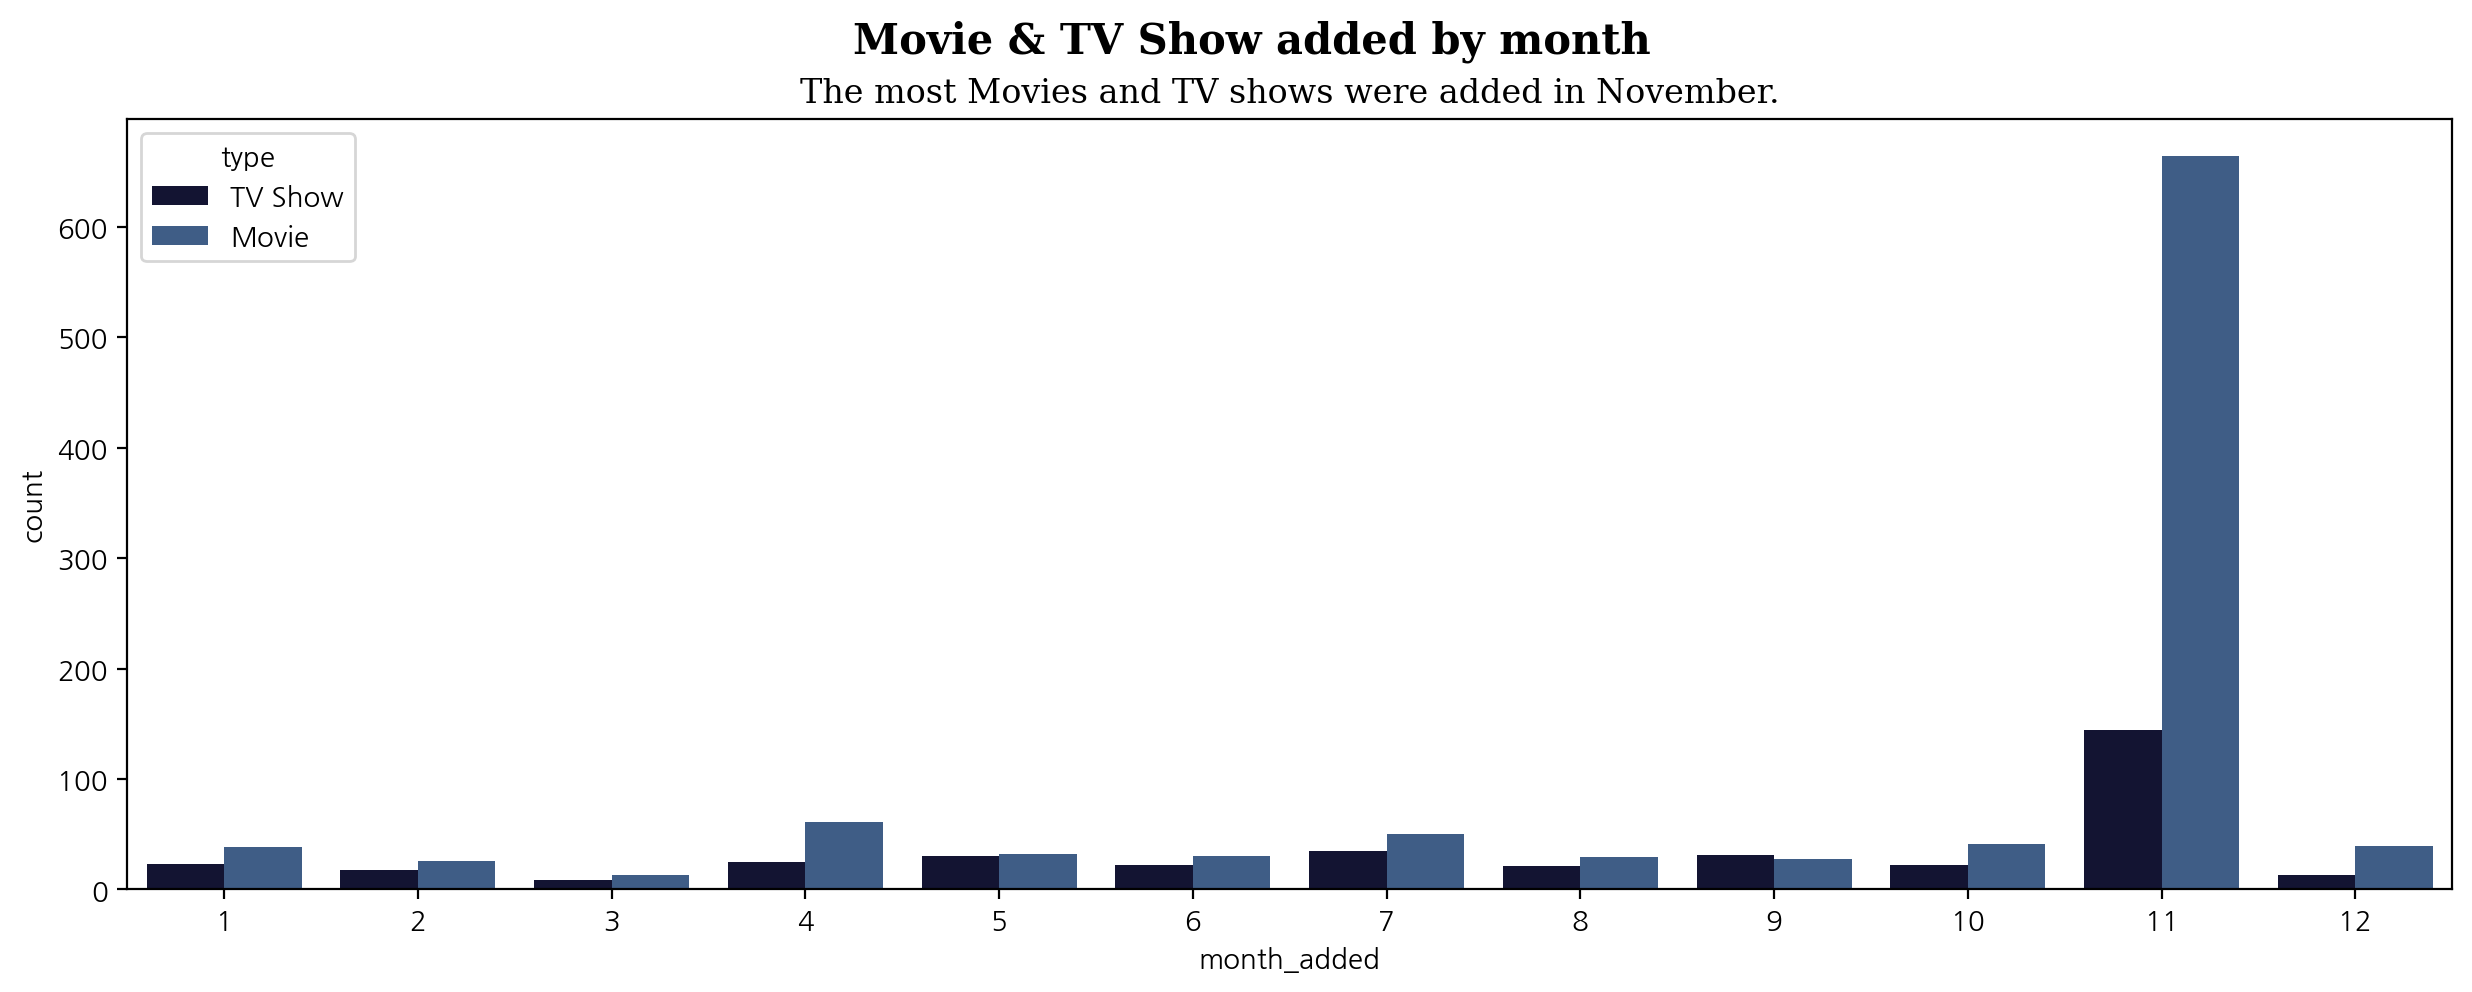

In [22]:
plt.figure(figsize=(15, 5))
# sns.countplot으로 인수 삽입하여 완성
sns.countplot(x='month_added', hue = 'type', palette = ['#0E0F37', '#335B92'], data=df) 
# 전체 제목 출력
plt.suptitle('Movie & TV Show added by month', fontfamily='serif', fontsize=15, fontweight='bold')
# 서브 플롯의 제목
plt.title('The most Movies and TV shows were added in November.', fontfamily='serif', fontsize=12)

plt.show()

## 3.2 주요 키워드 워드클라우드

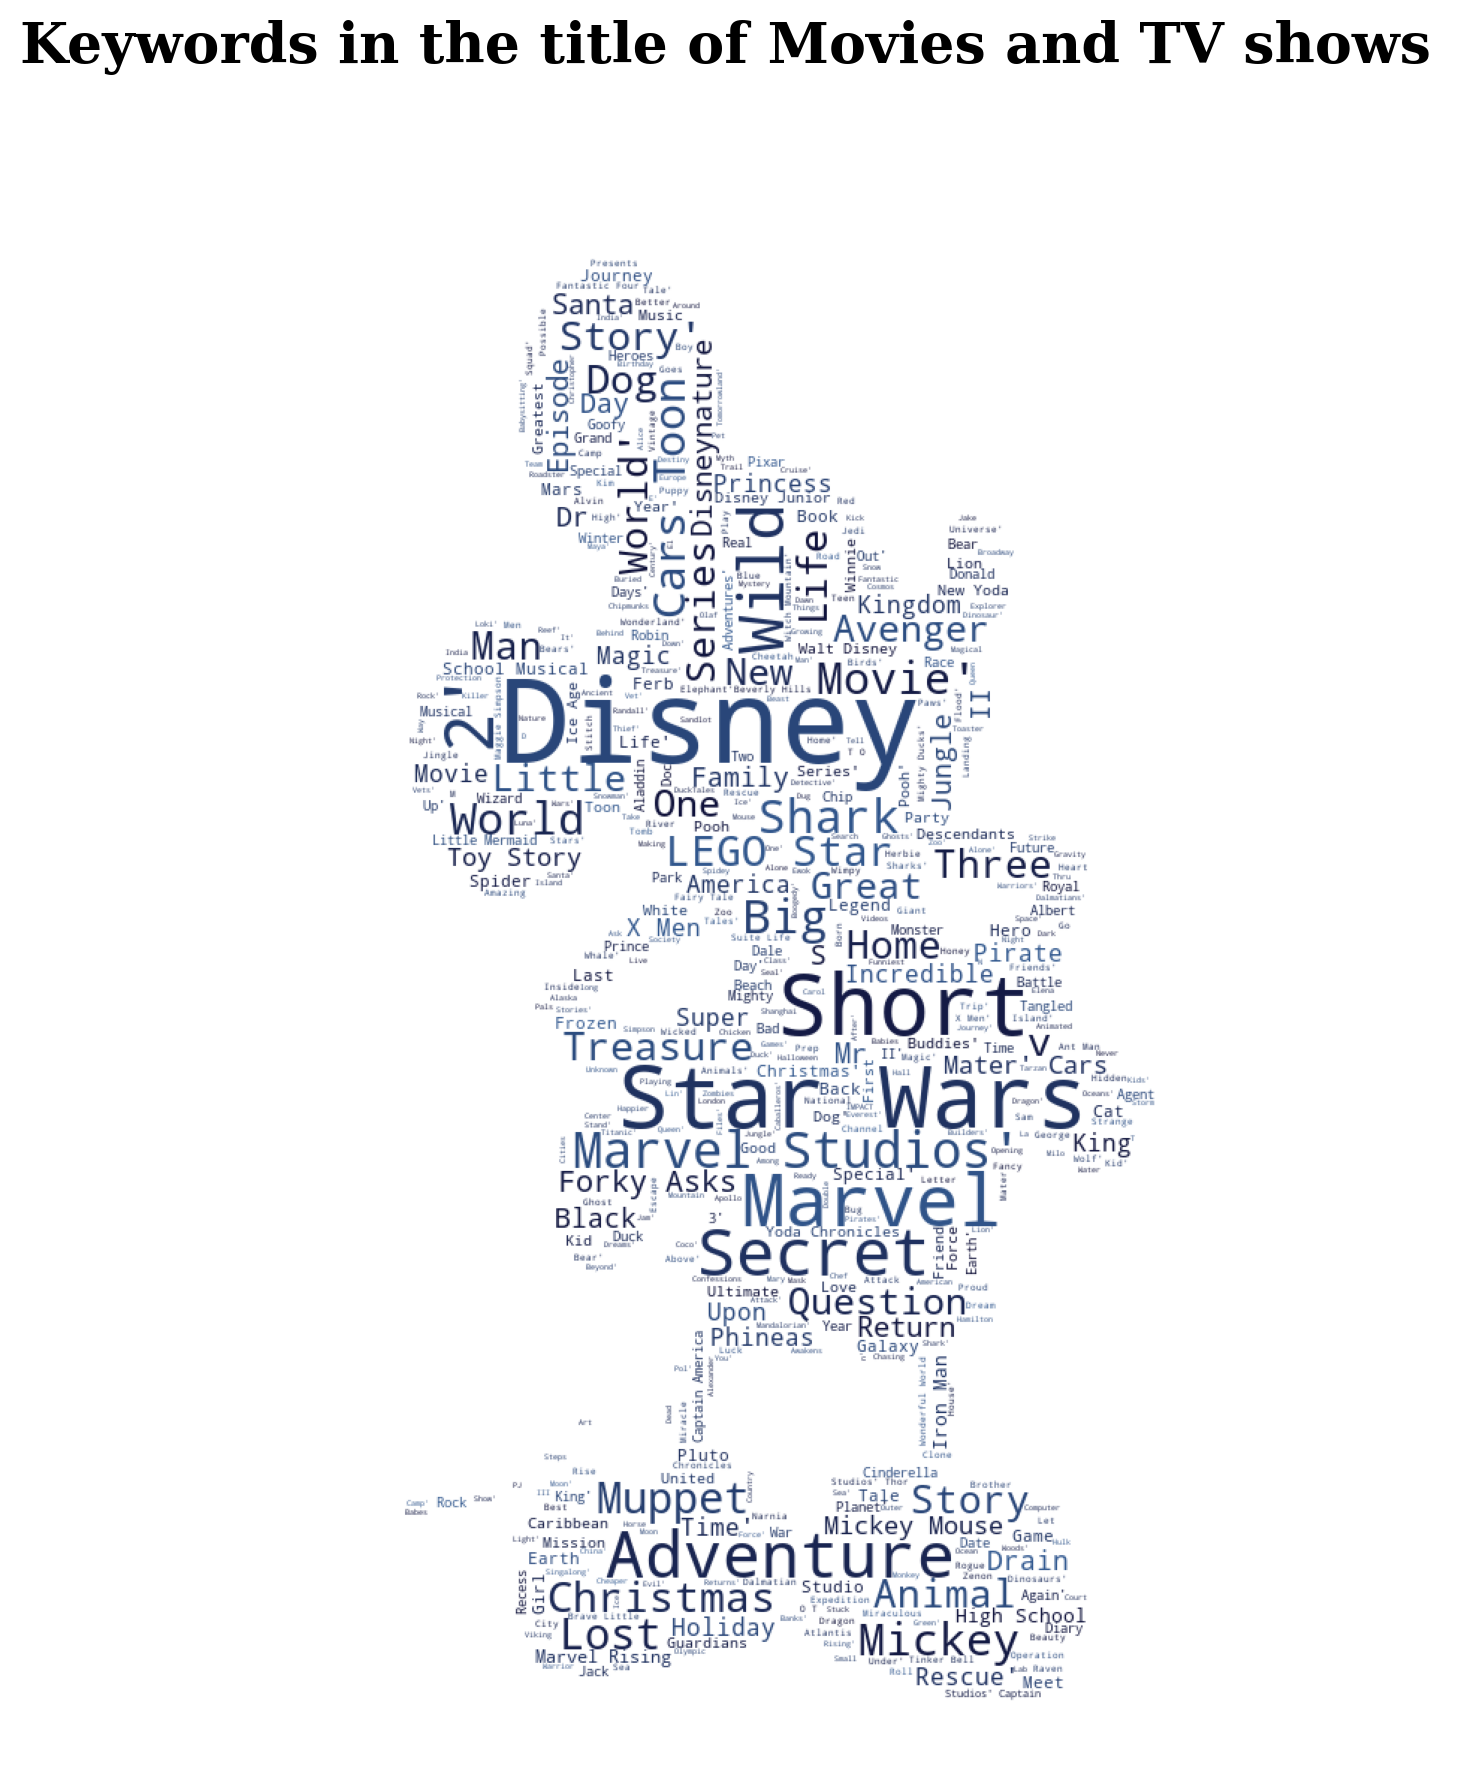

In [24]:
plt.figure(figsize=(20,10))

text = str(list(df['title']))
mask = np.array(Image.open('disney.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#0E0F37', '#335B92'])
wordcloud = WordCloud(background_color='white', width = 1000, height = 1000, max_words = 500, mask = mask, colormap = cmap).generate(text)

plt.suptitle('Keywords in the title of Movies and TV shows', fontweight='bold', fontfamily='serif', fontsize=20)   

plt.imshow(wordcloud)
plt.axis('off')
plt.show()